# Problem Statement


The dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column **AveragePrice** is the average price of a single avocado.

This is the data that we have to predict for **future samples**.

## Importing packagaes

In [9]:
import numpy as np 
np.set_printoptions(precision=4)    # to disply values upto Four decimal places

import pandas as pd
pd.set_option('mode.chained_assignment', None)   #to supress pandas warnings


import matplotlib.pyplot as plt
plt.style.use('seaborn-white')            # To apply seaborn white style to the plots
plt.rc('figure', figsize=(14,10))         # Set the default figure size of plots
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")  # To supress all the warnings in the notebook


## Data Loading and Description 

In [3]:
train_df = pd.read_csv('avocado_train.csv')
train_df.head(5)

Id        Date  AveragePrice  Total Volume       4046      4225    4770  \
0  14761  2017-08-20          1.86       2584.08      61.21    143.82    0.00   
1   6843  2017-11-12          1.14     100811.00    3181.00  43510.00   86.00   
2   7306  2017-02-12          0.95     430096.94  242212.80  81697.52  264.25   
3  12329  2016-05-22          1.71       5433.16     437.48   2422.71  544.63   
4  12036  2016-01-10          1.66       5614.09    2123.47   2121.26    0.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     2379.05     2379.05        0.00          0.0       organic  2017   
1    54034.00    11788.00    42246.00          0.0  conventional  2017   
2   105922.37    48557.37    57365.00          0.0  conventional  2017   
3     2028.34     2021.67        6.67          0.0       organic  2016   
4     1369.36      392.02      977.34          0.0       organic  2016   

       region  
0      Albany  
1  Louisville  
2     Orlando  
3   Charlotte  
4     Atlanta

In [4]:
train_df.shape

(14599, 14)

- We have **18249** rows and **14 columns** in the given dataset

## Description of the dataset



|Column Name	                              | Description                                                                   |
| --------------------------------------------|------------------------------------------------------------------------------:| 
| ID	                                      | Unique identity of each observation                                           |
| Date	                                      | The date of the observation.                                         | 
| **AveragePrice**	                                  | **The average price of a single avocado** - [Target Variable.]                                      |
| type	                                  | Conventional or Organic.                                               |
| year	                              | The year                                           |
| Region	                      | The city or region of the observation.                                  |
| Total Volume	                              | Total number of avocados sold                                                |
| 4046	                              | Total number of avocados with PLU 4046 sold.                                       |
| 4225	                              |Total number of avocados with PLU 4225 sold.                                                 |
| 4770	                      | Total number of avocados with PLU 4770 sold.                                     |
| Total Bag	                          |Total Bags of Avocados sold                           |
| Small Bags	                                  | Total number of Small Bags of Avocados sold.                                            |
| Large Bags                                  | Total number of Large Bags of Avocados sold.                                                  |
| XLarge Bags	                                  | Total number of XLarge Bags of Avocados sold.                             |

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   14599 non-null  int64  
 1   Date                 14599 non-null  int64  
 2   AveragePrice         14599 non-null  float64
 3   4046                 14599 non-null  float64
 4   4225                 14599 non-null  float64
 5   4770                 14599 non-null  float64
 6   SmallBags            14599 non-null  float64
 7   LargeBags            14599 non-null  float64
 8   XLBags               14599 non-null  float64
 9   year                 14599 non-null  int64  
 10  organic              14599 non-null  uint8  
 11  Atlanta              14599 non-null  uint8  
 12  BaltimoreWashington  14599 non-null  uint8  
 13  Boise                14599 non-null  uint8  
 14  Boston               14599 non-null  uint8  
 15  BuffaloRochester     14599 non-null 

- **info()**  function gives us the following insights into the avocado_df dataframe:
  - There are 9 float data points.
  - There are 2 Integer type data points.
  - There are 3 Object type data points.
  
  
- As per initial observation, it looks like there are **No Null** values present,
    <br>**We'll still confirm with a null check...**   

In [6]:
train_df.describe()

Id  AveragePrice  Total Volume          4046          4225  \
count  14599.000000  14599.000000  1.459900e+04  1.459900e+04  1.459900e+04   
mean    9116.120899      1.409168  8.136614e+05  2.787616e+05  2.835157e+05   
std     5279.989902      0.404518  3.292013e+06  1.206792e+06  1.150215e+06   
min        2.000000      0.440000  3.855500e+02  0.000000e+00  0.000000e+00   
25%     4538.500000      1.100000  1.080823e+04  8.493600e+02  3.018255e+03   
50%     9125.000000      1.370000  1.070186e+05  8.425390e+03  2.890747e+04   
75%    13698.500000      1.670000  4.261702e+05  1.087822e+05  1.451605e+05   
max    18249.000000      3.250000  6.250565e+07  2.162018e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   14599.000000   
mean   2.175564e+04  2.296264e+05  1.746354e+05  5.199545e+04    2995.622236   
std    1.025608e+05  9.429775e+05  7.139212e+05  2.343441e+05   17313.445157   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.040900e+03  2.828890e+03  1.314550e+02       0.000000   
50%    1.807200e+02  3.960296e+04  2.631176e+04  2.621750e+03       0.000000   
75%    6.136665e+03  1.096453e+05  8.300046e+04  2.151112e+04     127.940000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  14599.000000  
mean    2016.146174  
std        0.937565  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

### Data Exploration 

In [7]:
train_df.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

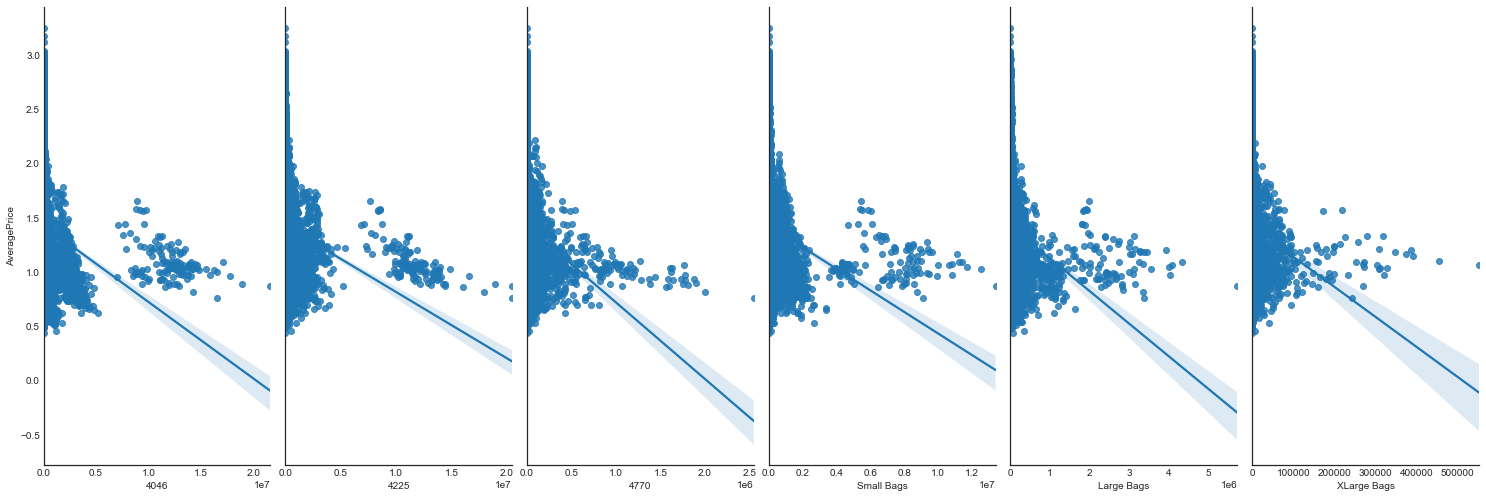

In [11]:
sns.pairplot(train_df, x_vars=['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags' ], y_vars='AveragePrice', size=7, aspect=0.5, kind='reg')

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

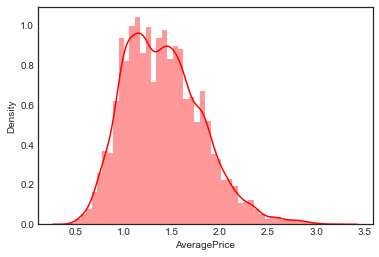

In [12]:
sns.distplot(train_df.AveragePrice , color="r")

- Average Price looks like a Normal Distribution , <br>This fulfills the first assumption for Linear Regression : **Target Variable should be Normally Distributed**

In [13]:
train_df.drop(['Total Volume', 'Total Bags'], axis=1, inplace=True)

- We'll drop Total Volume as it is the sum of values in columns - 4046, 4225, 4770
- We'll drop Total Bags as it is the sum of values in columns - Small Bags, Large Bags and XLarge Bags

In [14]:
date_ordering = sorted(train_df['Date'].unique())

Encoding Variables

- We'll order date in ascending order to relate the prices with the date of transaction to know how old or new the prices are.
   - The older the date is, lower will be the index value

In [15]:
def ordinal_encoding(df, column, order):
    df[column] = df[column].apply(lambda x: order.index(x))
    return df

def one_hot(df, col):
    dummy_type = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df, dummy_type], axis=1)
    df.drop(col, axis=1, inplace=True) #Dropping the original column as it has been eencoded and is not needed any further
    return df

In [16]:
ordinal_encoding(train_df, "Date", date_ordering)

Id  Date  AveragePrice       4046       4225      4770  Small Bags  \
0      14761   137          1.86      61.21     143.82      0.00     2379.05   
1       6843   149          1.14    3181.00   43510.00     86.00    11788.00   
2       7306   110          0.95  242212.80   81697.52    264.25    48557.37   
3      12329    72          1.71     437.48    2422.71    544.63     2021.67   
4      12036    53          1.66    2123.47    2121.26      0.00      392.02   
...      ...   ...           ...        ...        ...       ...         ...   
14594   3830    70          0.93   17356.36  106300.33  18838.87    54973.21   
14595    650    26          1.19  146171.45  428389.18  19546.92    88349.57   
14596   2574    26          1.45     797.75   35080.61   3980.63    28845.65   
14597   7731   109          0.97   75074.86   76042.48    151.02    59129.65   
14598  16551   149          1.45    1130.66      17.72      0.00    10217.59   

       Large Bags  XLarge Bags          type  year        region  
0            0.00         0.00       organic  2017        Albany  
1        42246.00         0.00  conventional  2017    Louisville  
2        57365.00         0.00  conventional  2017       Orlando  
3            6.67         0.00       organic  2016     Charlotte  
4          977.34         0.00       organic  2016       Atlanta  
...           ...          ...           ...   ...           ...  
14594    27766.71      3365.91  conventional  2016  Indianapolis  
14595    54456.03         0.00  conventional  2015        Denver  
14596      217.78         0.00  conventional  2015      Syracuse  
14597     1337.38       408.33  conventional  2017       Roanoke  
14598        3.33         0.00       organic  2017    Pittsburgh  

[14599 rows x 12 columns]

In [17]:
train_df = one_hot(train_df, 'type')
train_df = one_hot(train_df, 'region')

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   14599 non-null  int64  
 1   Date                 14599 non-null  int64  
 2   AveragePrice         14599 non-null  float64
 3   4046                 14599 non-null  float64
 4   4225                 14599 non-null  float64
 5   4770                 14599 non-null  float64
 6   Small Bags           14599 non-null  float64
 7   Large Bags           14599 non-null  float64
 8   XLarge Bags          14599 non-null  float64
 9   year                 14599 non-null  int64  
 10  organic              14599 non-null  uint8  
 11  Atlanta              14599 non-null  uint8  
 12  BaltimoreWashington  14599 non-null  uint8  
 13  Boise                14599 non-null  uint8  
 14  Boston               14599 non-null  uint8  
 15  BuffaloRochester     14599 non-null 

In [19]:
train_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

- As we can see, there are majorly 3 datatypes that we are dealing with:
    - Int
    - float
    - object

In [20]:
train_df.rename(columns={'Small Bags': 'SmallBags', 'Large Bags': 'LargeBags', 'XLarge Bags': 'XLBags'}, inplace=True)

In [21]:
#Analysing the target variable
train_df.AveragePrice.value_counts().sample(5)

1.52    123
2.05     34
3.25      1
1.74     89
1.61     99
Name: AveragePrice, dtype: int64

In [22]:
print("The Average Values of Avocados ranges between {0} and {1}".format(train_df.AveragePrice.min(), train_df.AveragePrice.max()))

The Average Values of Avocados ranges between 0.44 and 3.25


In [25]:
X = train_df.loc[:, train_df.columns != 'AveragePrice']
y = pd.DataFrame(train_df.AveragePrice)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Modules for executing time and error
from sklearn import metrics
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [27]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)

X_train shape :  (11679, 63)
y_train shape :  (11679, 1)


In [28]:
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_test shape :  (2920, 63)
y_test shape :  (2920, 1)


In [29]:
scaler = StandardScaler() # create an object

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


We are using 3 modelling techniques to get the best results. We aim the following:

  - Low Errors in test set (RMSE)
  - High R-squared and Adjusted R-squared score

### Linear Regression with GridSearch CV

In [39]:
linreg = LinearRegression()
parameters = {'normalize':[True,False], 'copy_X':[True, False]}
linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
start_time = time.process_time()                                                 # to measure training time

linreg.fit(X_train_scaled, y_train)                       # fit the model to the training data (learn the coefficients)
print("Total Training Time : %s seconds" %(time.process_time() - start_time))
print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  

Total Training Time : 5.46875 seconds
Mean cross-validated score of the best_estimator :  0.5921469033200362


### Prediction

In [40]:
#prediction
y_pred_train  = linreg.predict(X_train_scaled)
time_pred = time.process_time()
y_pred_test = linreg.predict(X_test_scaled)                                     # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.process_time() - time_pred))

Total predicting time for the test set : 0.0 seconds


### Evalution Metrics

In [41]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
# MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)

MSE_test = metrics.mean_squared_error(y_test,y_pred_test)

RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))            # compute the RMSE of our predictions
# RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.19545362120818427
MSE of the model is 0.06520661821644146
RMSE of the model is 0.2553558658351937
R squared error of the model is 0.5890300973881164
Adjusted R squared error of the model is 0.5799645848305013
--------------------------------------------------------------------------


### Decision Tree Regression with GridSearchCV

In [42]:
dt=DecisionTreeRegressor()

In [43]:
# Number of features to consider at every split
max_features = ['auto', 'log2',2,4,8,12]
# Maximum number of levels in tree
max_depth = [2,4,8,16,25]
max_depth.append(None)
param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               }

In [44]:
dt_model = GridSearchCV(estimator = dt, param_grid=param_grid, cv = 3, n_jobs = -1 ) #n_jobs=-1 to use all the cores

start_time = time.process_time()
dt_model.fit(X_train_scaled,y_train)
print('Total Training Time : %s seconds'%(time.process_time() - start_time))

Total Training Time : 0.78125 seconds


### Predictions

In [46]:
y_pred_train = dt_model.predict(X_train_scaled)

time_pred = time.process_time()
y_pred_test = dt_model.predict(X_test_scaled)                         # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.process_time() - time_pred))

Total predicting time for the test set : 0.0 seconds


### Evalution Metrics

In [47]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.11643493150684932
MSE of the model is 0.031490034246575344
RMSE of the model is 0.2553558658351937
R squared error of the model is 0.8015315521408709
Adjusted R squared error of the model is 0.7971535716733902
--------------------------------------------------------------------------


In [48]:
dt_model.score(X_train_scaled,y_train)

1.0

In [49]:
dt_model.best_params_

{'max_depth': None, 'max_features': 'auto'}

### Random Forest Regression with GridSearchCV 

In [50]:
rf=RandomForestRegressor()

In [51]:
# Number of trees in random forest
n_estimators = [100,200,300,500]
# Number of features to consider at every split
# max_features = ['auto', 'log2','sqrt',4,8,12]
max_features = ['auto', 0.2,'log2',0.4,0.6]
# Maximum number of levels in tree
max_depth = [8,16,25]

max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               "bootstrap": [True, False],
               "oob_score": [True]      #oob_score: Out of Bag Score; Bagging or Bootstrap Aggregation of scores
               }

In [52]:
rf_model = GridSearchCV(estimator = rf, param_grid=random_grid, cv = 3, n_jobs = -1 ) #n_jobs=-1 to use all the cores
start_time = time.process_time()
rf_model.fit(X_train_scaled,y_train)
print("Total Training Time : %s seconds" %(time.process_time() - start_time ))

Total Training Time : 41.4375 seconds


### Predictions

In [53]:
rf_best_model = rf_model.best_estimator_         #replacing with the best estimator
y_pred_train = rf_best_model.predict(X_train_scaled)

time_pred = time.process_time()
y_pred_test = rf_best_model.predict(X_test_scaled)                         # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.process_time() - time_pred))

Total predicting time for the test set : 0.828125 seconds


### Evalution Metrics

In [54]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.08102536179604275
MSE of the model is 0.013113203267763848
RMSE of the model is 0.2553558658351937
R squared error of the model is 0.9173529924218045
Adjusted R squared error of the model is 0.915529896666403
--------------------------------------------------------------------------


In [55]:
rf_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.4,
 'n_estimators': 500,
 'oob_score': True}

In [56]:
rf_model.score(X_train_scaled, y_train)

0.9885437926386479

In [57]:
rf_model.best_estimator_

RandomForestRegressor(max_features=0.4, n_estimators=500, oob_score=True)

### Plotting predicted values and actual values 

In [58]:
y_test_flat = y_test.values.flatten()
y_test_flat

array([1.  , 1.8 , 1.76, ..., 1.27, 1.63, 1.58])

Text(0, 0.5, 'Predicted Test Value')

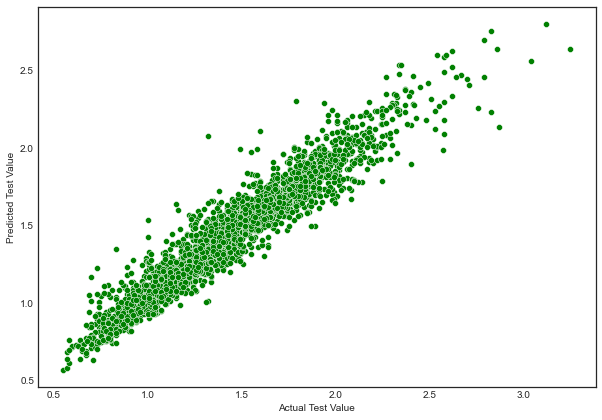

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= y_test_flat, y=y_pred_test, color='g')
plt.xlabel('Actual Test Value')
plt.ylabel("Predicted Test Value")

From the above plot we could observe that there is no much difference b/w actual & predicted values

We predicted the Average Prices of Avocados on the basis of various features using 3 models. The RMSE and R squared values of each of them are as follows:

|Algorithm used for the Model	| RMSE score  |       R-squared score                                |
| ------------------------------|-------------|-----------------------------------------------------:| 
| Linear Regression	            |      0.25   |        0.58                                          |
| Decision Trees                |      0.25   |        0.80                                          | 
| Random Forest  	            |      0.25   |        0.91                                          |

- While all the models have similar RMSE Scores, **Random Forest** has the greatest performance with the highest variance explained score (R-squared) of 0.91